<a href="https://colab.research.google.com/github/dmyam123/CSC302/blob/main/Final_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/drive/MyDrive/babies.csv")
df.head()

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


<Axes: xlabel='gestation', ylabel='Proportion'>

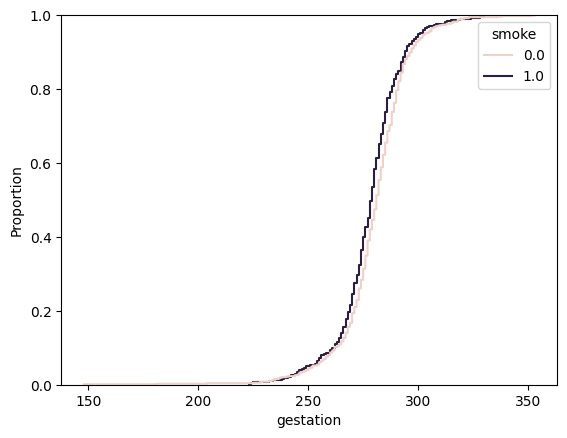

In [7]:
sns.ecdfplot(data=df, x='gestation', hue='smoke')

In [33]:
!pip install seaborn_qqplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ValueError: ignored

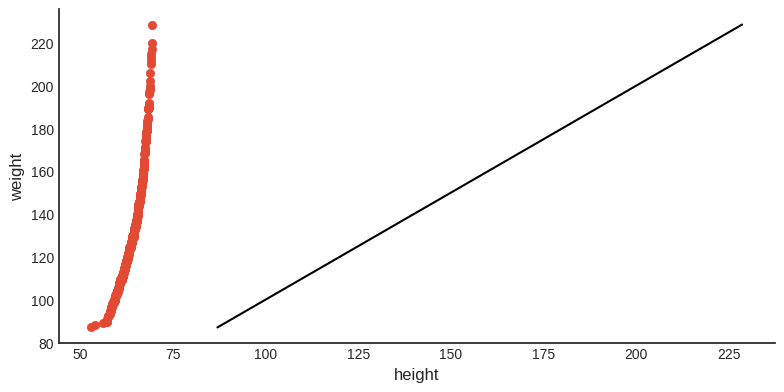

In [36]:
from seaborn_qqplot import pplot #seaborn-qqplot is a seaborn extension adding qqplots.
from scipy.stats import norm
pplot(df, x='height', y='weight', kind = 'qq', display_kws={"identity":True}, height=4, aspect=2)
pplot(df, x='height', y=norm, kind = 'qq', display_kws={"identity":True}, height=4, aspect=2)

<Axes: >

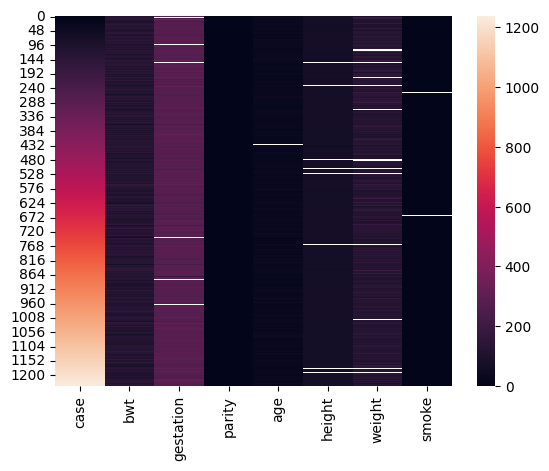

In [10]:
import seaborn as sb
sb.heatmap(df)

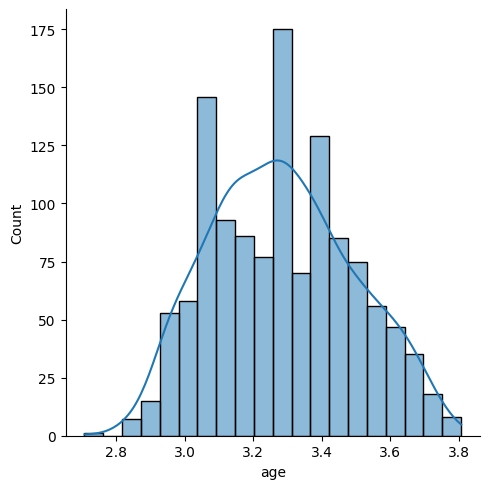

In [13]:
sns.displot(np.log(df['age']), kind='hist', kde='True')

In [17]:
!pip install joypy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import joypy as jp
from matplotlib import cm

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<ipython-input-31-2051a2d2814a>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



(<Figure size 640x480 with 3 Axes>, [<Axes: >, <Axes: >, <Axes: >])

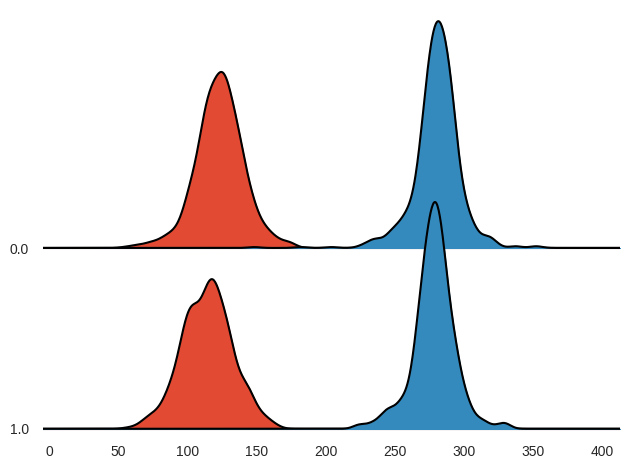

In [31]:

print(plt.style.available)
plt.style.use('seaborn-white')
jp.joyplot(data=df, column=['bwt', 'gestation'], by='smoke', ylim='own' ) #ylim='own'


In [28]:
px.parallel_categories(df, dimensions=['bwt', 'gestation', 'height', 'weight'], color="age", color_continuous_scale=px.colors.sequential.Inferno)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb870205bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb870215130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb8702059a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb870215670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb870215910>],
 'means': []}

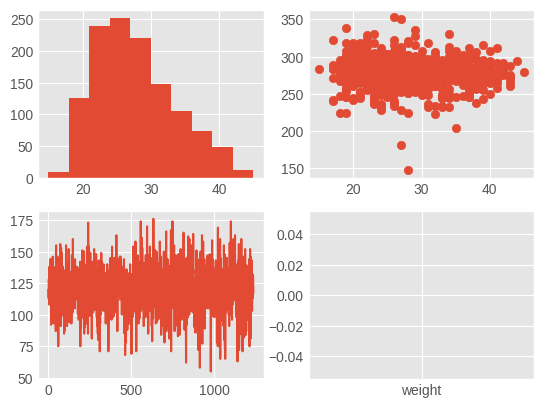

In [30]:
fig, ax = plt.subplots(2,2)
ax[0,0].hist(data=df, x='age')
ax[0,1].scatter(data=df, x='age', y='gestation')
ax[1,0].plot(df['bwt'])
ax[1,1].boxplot(df['weight'], labels=['weight'])

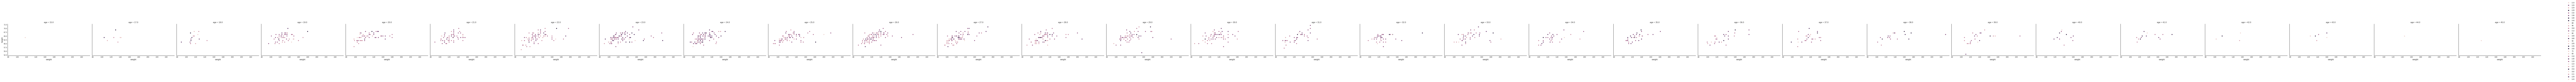

In [42]:
g = sns.FacetGrid(df, col="age", height=3.5, aspect=2)
g.map_dataframe(sns.scatterplot, x="weight", y="height", hue="bwt")
g.add_legend()